In [24]:
import pandas as pd 
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msn
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv( r'C:\Users\mustafayevavb\Desktop\Data Coders\Lesson Codes\Hitters.csv')

In [5]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [7]:
data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

<AxesSubplot:>

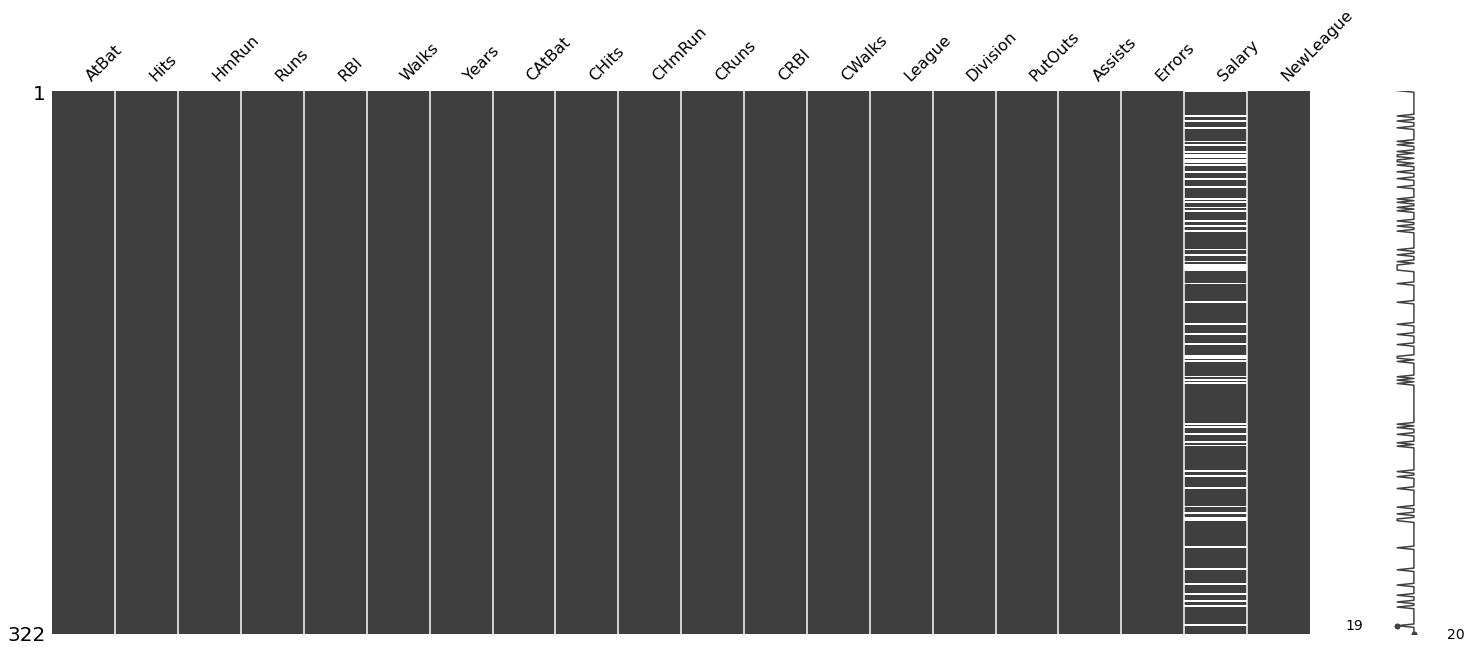

In [11]:
msn.matrix(data)

<AxesSubplot:>

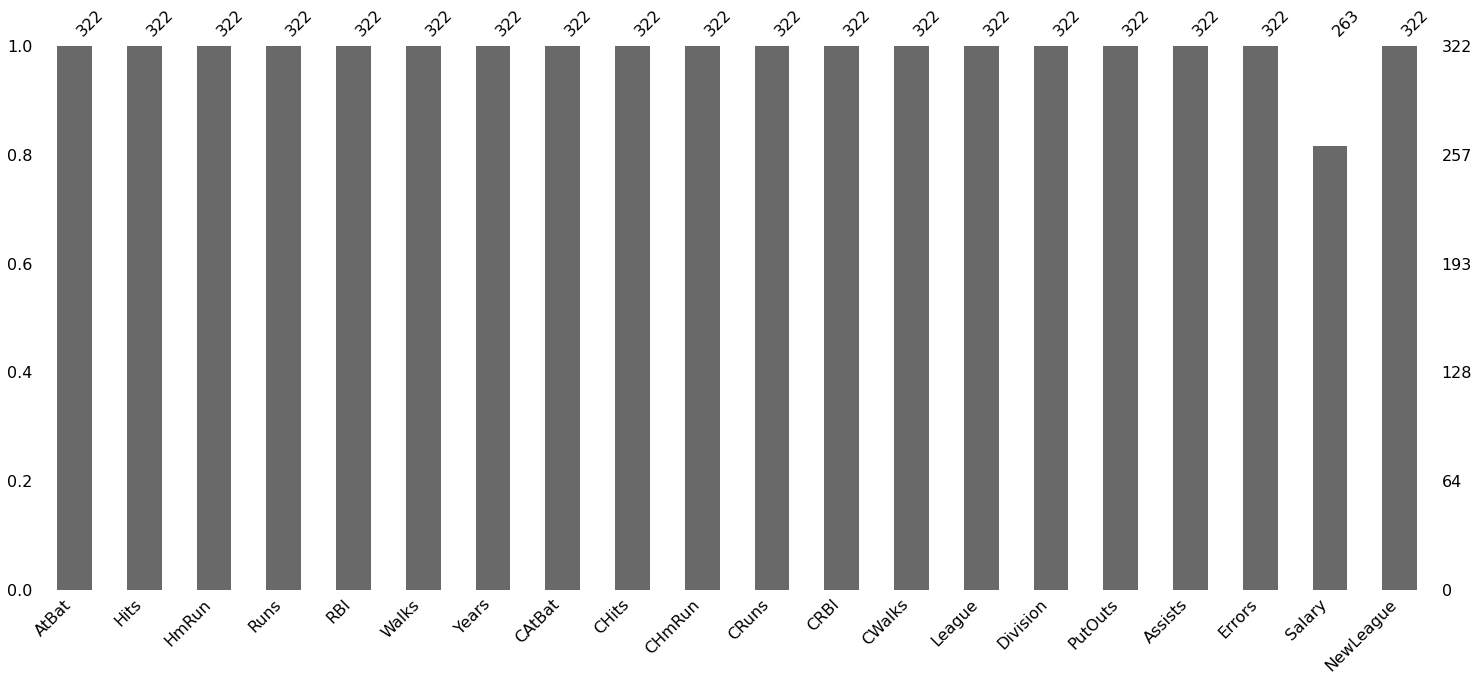

In [12]:
msn.bar(data)

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [16]:
# numeric ve catagorik col
numeric_cols = data._get_numeric_data().columns

In [17]:
cagatagoric_cols = list(set(data.columns)-set(numeric_cols))

########## Division ##########
W    134
E    129
Name: Division, dtype: int64


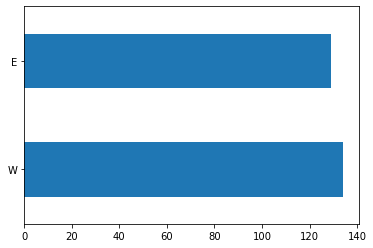

########## NewLeague ##########
A    141
N    122
Name: NewLeague, dtype: int64


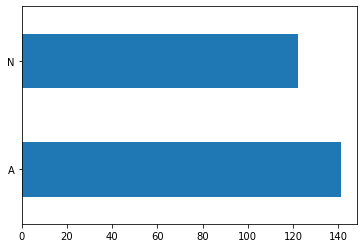

########## League ##########
A    139
N    124
Name: League, dtype: int64


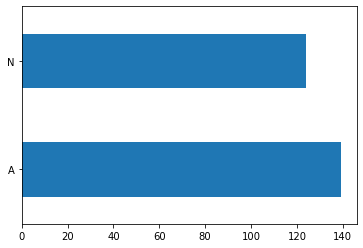

In [21]:
for col in cagatagoric_cols:
    print('#'*10, col,'#'*10)
    print(data[col].value_counts())
    data[col].value_counts().plot.barh()
    plt.show()

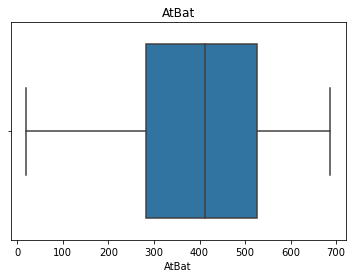

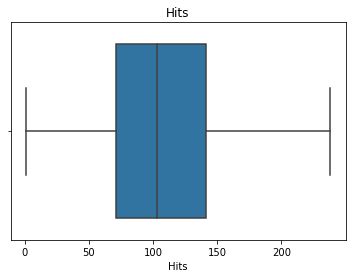

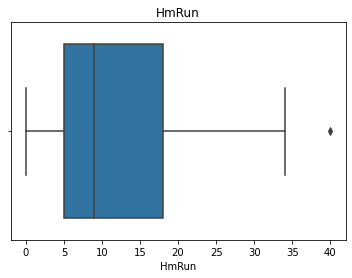

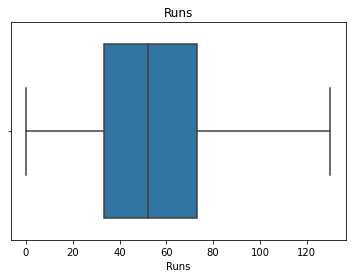

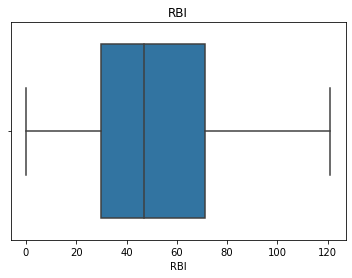

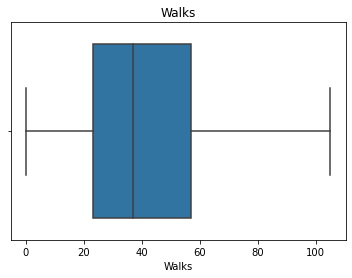

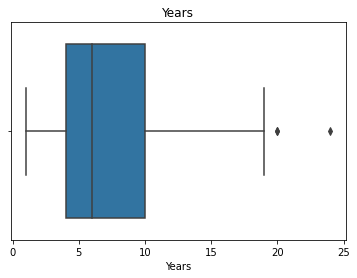

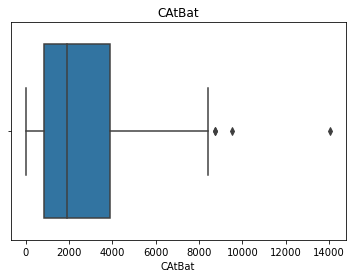

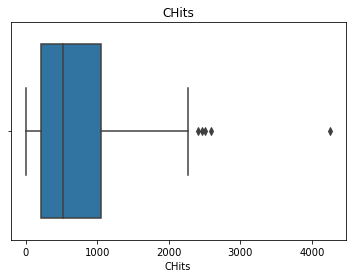

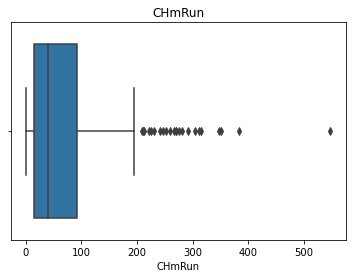

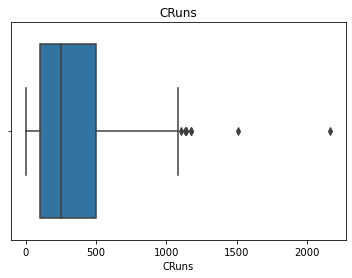

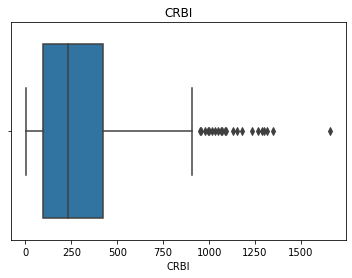

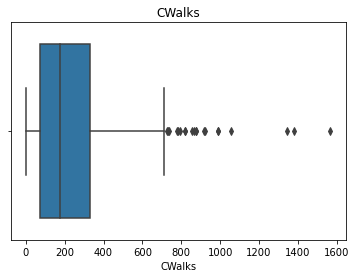

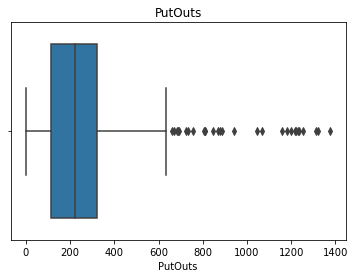

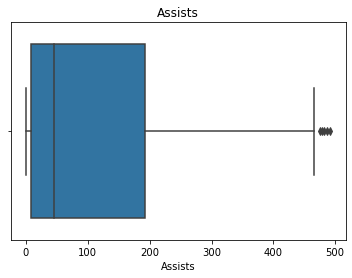

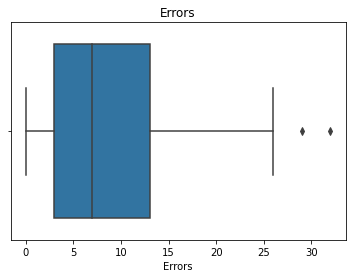

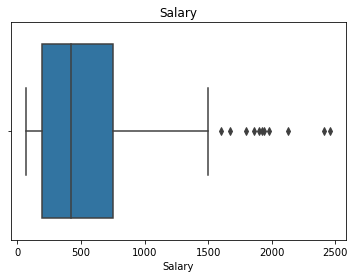

In [25]:
for col in numeric_cols:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='AtBat', ylabel='Count'>

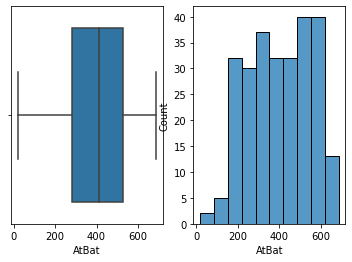

In [30]:
fig,ax=plt.subplots(nrows=1, ncols=2)

sns.boxplot(data['AtBat'],ax=ax[0])
sns.histplot(data['AtBat'],ax=ax[1])



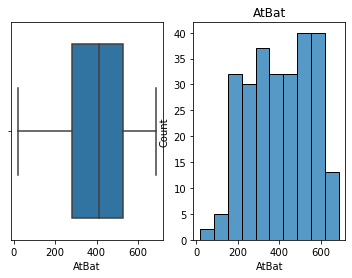

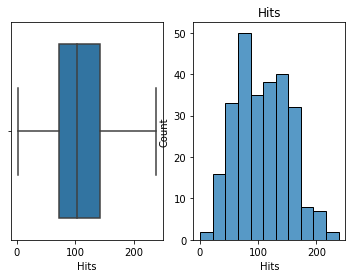

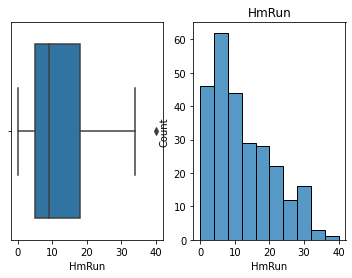

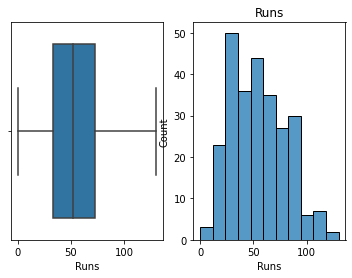

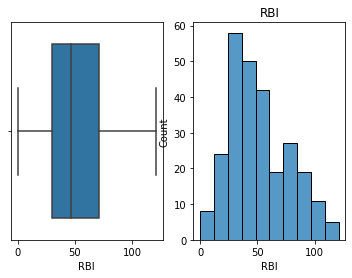

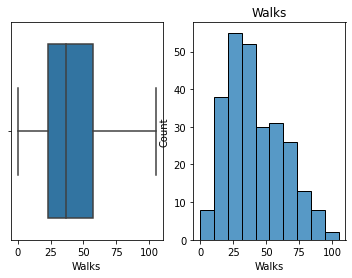

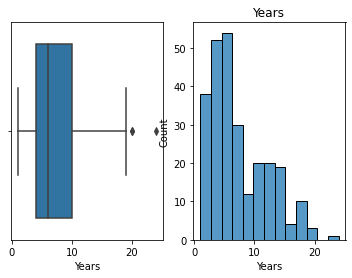

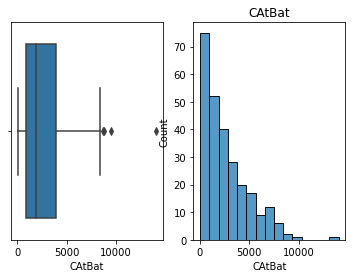

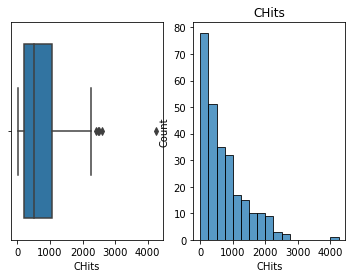

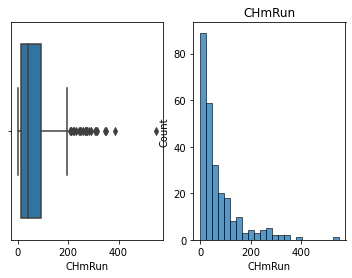

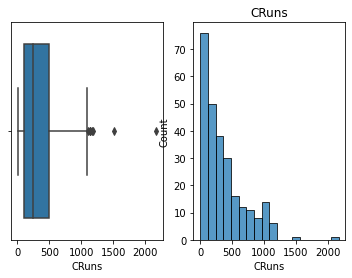

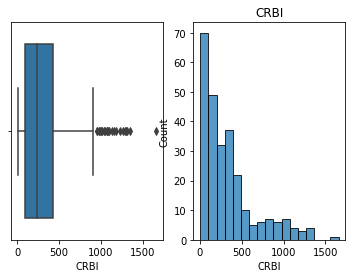

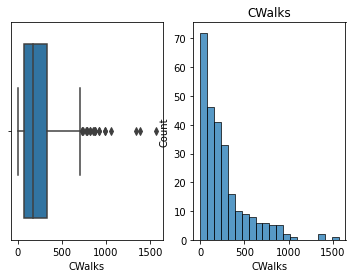

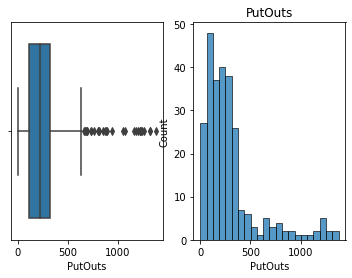

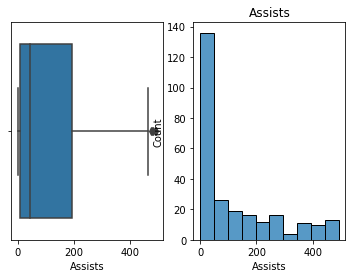

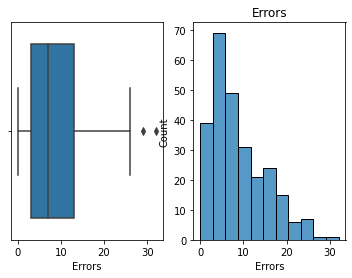

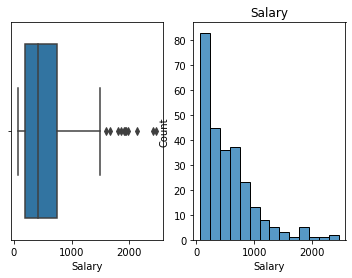

In [39]:
for col in numeric_cols:
    fig, ax=plt.subplots(nrows=1, ncols=2)
    plt.title(col)
    sns.boxplot(data[col],ax=ax[0])
    sns.histplot(data[col],ax=ax[1])
    plt.show()

In [40]:
def outliners_bounds(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3*1.5*IQR
    
    return lower_bound,upper_bound

In [41]:
print(outliners_bounds(data,'AtBat'))

(-82.75, 192121.5)


In [44]:
def outliners_indexs(data,col):
    l_b, u_b = outliners_bounds(data,col)
    
    return data[(data[col]<l_b)| (data[col]>u_b)].index

In [45]:
print(outliners_indexs(data,'Salary'))

Int64Index([], dtype='int64')


In [46]:
def drop_outliners (data,col):
    indexs = outliners_indexs(data,col)
    return data.drop(list(indexs),axis=0)

In [47]:
data_drop = data.copy()

In [49]:
for col in numeric_cols:
    data_drop = drop_outliners(data_drop,col)
    print(data_drop)

     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
1      315    81      7    24   38     39     14    3449    835      69   
2      479   130     18    66   72     76      3    1624    457      63   
3      496   141     20    65   78     37     11    5628   1575     225   
4      321    87     10    39   42     30      2     396    101      12   
5      594   169      4    74   51     35     11    4408   1133      19   
..     ...   ...    ...   ...  ...    ...    ...     ...    ...     ...   
317    497   127      7    65   48     37      5    2703    806      32   
318    492   136      5    76   50     94     12    5511   1511      39   
319    475   126      3    61   43     52      6    1700    433       7   
320    573   144      9    85   60     78      8    3198    857      97   
321    631   170      9    77   44     31     11    4908   1457      30   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
1      321   414     

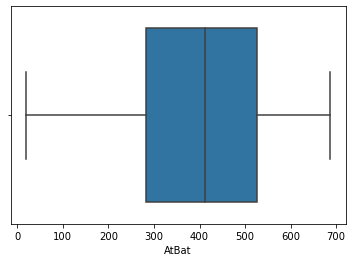

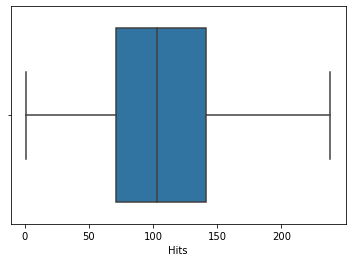

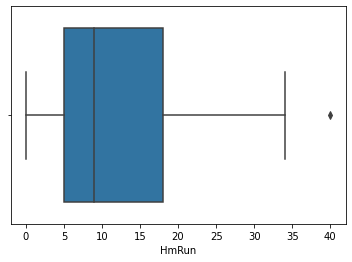

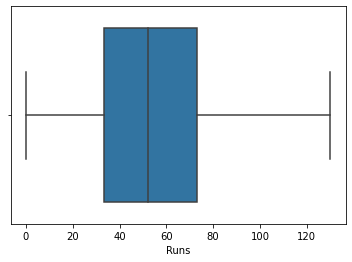

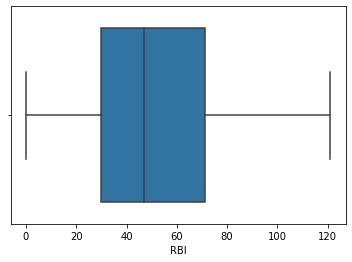

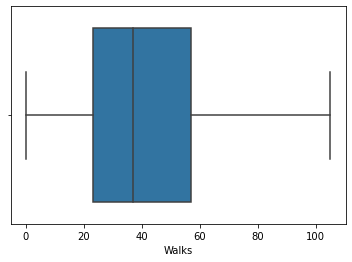

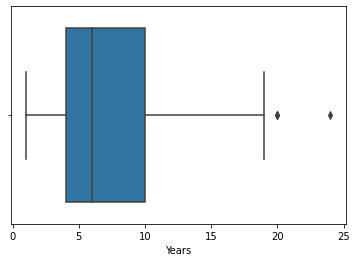

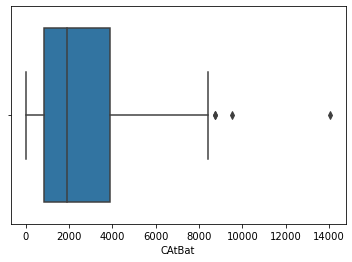

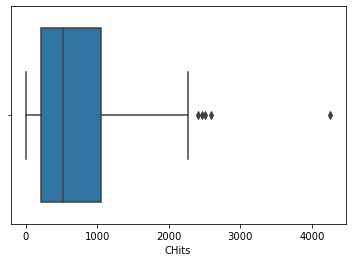

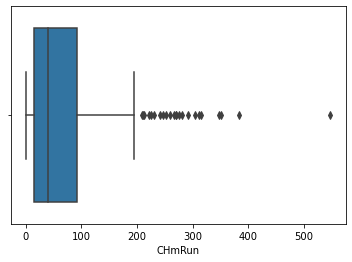

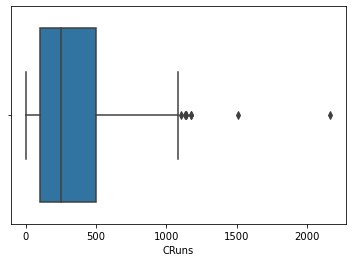

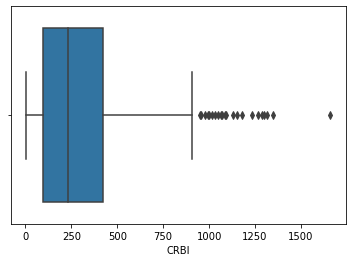

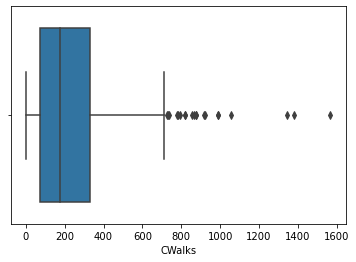

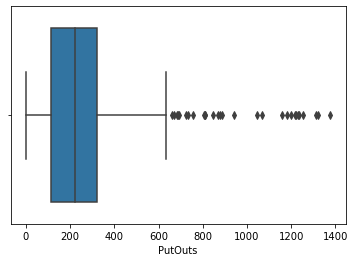

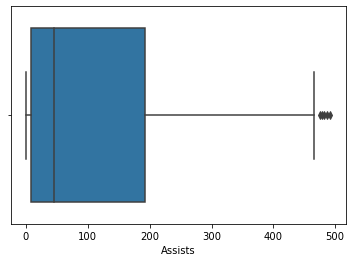

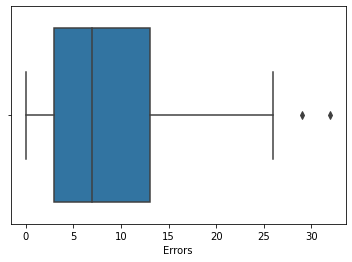

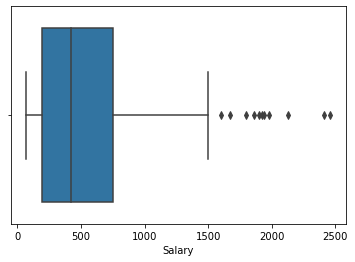

In [50]:
for col in numeric_cols:
    sns.boxplot(data_drop[col])
    plt.show()